# Exemplar: Explore probability distributions

## **Introduction**

The ability to `determine which type of probability distribution best fits data, calculate z-score, and detect outliers` are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this lab, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [1]:
# Import relevant libraries, packages, and modules.

### YOUR CODE HERE ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. Load into a DataFrame.

In [30]:
# Load data into a DataFrame and save in a variable.

### YOUR CODE HERE ###

data1 = pd.read_csv("epa_air.csv")

In [31]:
data1 = data1.dropna()

In [32]:
data1

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
...,...,...,...,...,...,...,...,...
254,2018-01-01,Arizona,Pima,Tucson,CHERRY & GLENN,Carbon monoxide,Parts per million,2.708050
255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,1.386294
256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,1.098612
257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,1.098612


## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [3]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. 

In [4]:
# Display the number of columns
data.shape

(260, 8)

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution

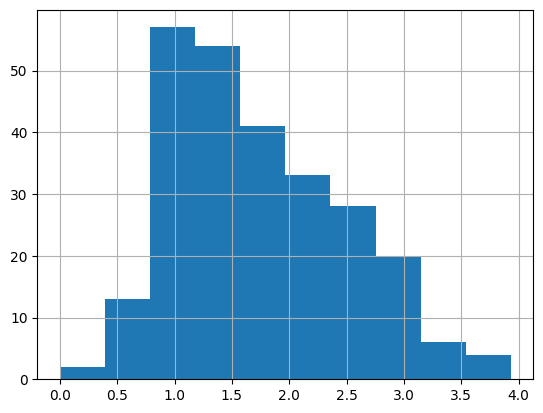

In [5]:
# Create a histogram to visualize distribution of aqi_log.



data["aqi_log"].hist();

**insight**

There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.

 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule.

In [6]:
# Define variable for aqi_log mean.
mean_aqi_log = data["aqi_log"].mean()

# Print out the mean.
print(mean_aqi_log)

1.7694151644253058


In [7]:
# Check std deviation
std_aqi_log = data["aqi_log"].std()
print(std_aqi_log)

0.7162730130059963


Now, check the first part of the empirical rule: whether 68% of the aqi_log data falls within 1 standard deviation of the mean.
To compute the actual percentage of the data that satisfies this criteria, `define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean).` This will enable you to create a range and confirm whether each value falls within it.

The lower limit here is $mean - 1 * std$.

The upper limit here is $mean + 1 * std$.

In [8]:
# Define variable for lower limit, 1 standard deviation below the mean
lower_limit = mean_aqi_log - 1*std_aqi_log
# Define variable for upper limit, 1 standard deviation above the mean
upper_limit = mean_aqi_log + 1*std_aqi_log
# Print upper limit and lower limit
print(lower_limit)
print(upper_limit)

1.0531421514193093
2.485688177431302


In [ ]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.

### YOUR CODE HERE ### 

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100b

The `mean()` function can be used to compute the proportion of the data that satisfies the specified conditions. 

Multiplying that proportion by $100$ can get you the percentage.

In [11]:
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean()*100

78.46153846153847

Now, check the first part of the empirical rule: whether 68% of the aqi_log data falls within 2 standard deviation of the mean. To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviation below the mean) and the upper limit (for example, 2 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [12]:
# Define variable for lower limit, 2 standard deviations below the mean.




lower_limit_2 = mean_aqi_log - 2 * std_aqi_log


# Define variable for upper limit, 2 standard deviations below the mean.



upper_limit_2 = mean_aqi_log + 2 * std_aqi_log


# Display lower_limit, upper_limit.



print(lower_limit_2, upper_limit_2)

0.3368691384133131 3.2019611904372987


In [13]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.

### YOUR CODE HERE ### 

((data["aqi_log"] >= lower_limit_2) & (data["aqi_log"] <= upper_limit_2)).mean() * 100

95.0

Now, check the first part of the empirical rule: whether 68% of the aqi_log data falls within 3 standard deviation of the mean. To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviation below the mean) and the upper limit (for example, 3 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within i

In [14]:
# Define variable for lower limit, 3 standard deviations below the mean.

### YOUR CODE HERE ###

lower_limit_3 = mean_aqi_log - 3 * std_aqi_log


# Define variable for upper limit, 3 standard deviations above the mean.

### YOUR CODE HERE ###

upper_limit_3 = mean_aqi_log + 3 * std_aqi_log


# Display lower_limit, upper_limit.

### YOUR CODE HERE ###

print(lower_limit_3, upper_limit_3)

-0.3794038745926831 3.9182342034432946


In [15]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.


((data["aqi_log"] >= lower_limit_3) & (data["aqi_log"] <= upper_limit_3)).mean() * 100

98.84615384615385

## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 
- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.

**Question:** How would you use z-score to find outliers?

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.
Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.
Compute the z-score for every aqi_log value. Then, add a column named z_score in the data to store those results.

In [33]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data1["z_score"] = stats.zscore(data1["aqi_log"])

In [34]:
data1

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.429745
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.028329
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.938853
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.537436
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.537436
...,...,...,...,...,...,...,...,...,...
254,2018-01-01,Arizona,Pima,Tucson,CHERRY & GLENN,Carbon monoxide,Parts per million,2.708050,1.306873
255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,1.386294,-0.537436
256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,1.098612,-0.938853
257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,1.098612,-0.938853


In [35]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean



data1[(data1["z_score"] > 3) | (data1["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.014466


**Question:** What do you observe about potential outliers based on the calculations?

The `aqi_log` for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

**Question:** Why is outlier detection an important part of this project? 

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements. 

For example, if the `aqi_log` for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

- Plotting the data using a histogram, then observing the shape, enables you to visually determine whether the data is normally distributed.
- The empirical rule can be used to verify whether a distribution is normal.
- The mean and standard deviation are important measures when applying the empirical rule to a distribution.
- Z-score allows you to identify potenial outliers in the data.

**What summary would you provide to stakeholders? Consider the distribution of the data and which sites would benefit from additional research.**
- The distribution of the `aqi_log` data is approximately normal.
- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 
- Consider allocating more resources toward further examining this site in order to improve its air quality.